In [36]:
medical_keywords = [
    # General medical terms
    'doctor', 'patient', 'hospital', 'clinic', 'nurse', 'physician', 'surgeon',
    'medical', 'diagnosis', 'treatment', 'therapy', 'symptom', 'illness', 'disease',

    # Body parts and systems
    'heart', 'lung', 'brain', 'kidney', 'muscle', 'artery', 'blood',
    'immune', 'digestive', 'respiratory', 'cardiovascular', 'nervous', 'endocrine',

    # Common symptoms and conditions
    'painful', 'fever', 'inflammation', 'infection', 'fracture', 'tumor', 'cancer',
    'diabetes', 'hypertension', 'asthma', 'arthritis', 'alzheimer', 'stroke',

    # Medical procedures and tests
    'surgery', 'biopsy', 'transplant', 'vaccination', 'chemotherapy',
    'dialysis', 'x-ray', 'mri', 'ctscan', 'ultrasound', 'endoscopy', 'inflammation'

    # Medications and treatments
    'antibiotic', 'vaccine', 'insulin', 'steroid', 'antidepressant', 'painkiller',
    'aspirin', 'ibuprofen', 'acetaminophen', 'metformin', 'lisinopril', 'levothyroxine',
    'amlodipine', 'metoprolol', 'omeprazole', 'gabapentin', 'sertraline', 'fluoxetine',
    'atorvastatin', 'losartan', 'albuterol', 'warfarin', 'tramadol', 'amoxicillin',
    'hydrocodone', 'metformin', 'escitalopram', 'citalopram', 'simvastatin', 'metoprolol',
    'bupropion', 'venlafaxine', 'pantoprazole', 'furosemide', 'clopidogrel', 'prednisone',

    # Medical specialties
    'cardiology', 'neurology', 'oncology', 'pediatrics', 'psychiatry', 'orthopedics',
    'gynecology', 'urology', 'dermatology', 'endocrinology', 'gastroenterology',

    # Medical equipment
    'stethoscope', 'defibrillator', 'ventilator', 'pacemaker', 'catheter', 'scalpel',

    # Healthcare facilities

    # Medical professionals
    'cardiologist', 'neurologist', 'pediatrician', 'psychiatrist', 'surgeon', 'anesthesiologist','anatomy'

    # Medical research and education

    # Public health
    'epidemic', 'pandemic', 'vaccination', 'quarantine',

    # Mental health
    'depression', 'anxiety', 'schizophrenia', 'bipolar', 'ptsd', 'addiction', 'asthma', 'intestines', 'pulmonary', 'breast',
    'bowel', 'chemotherapy',
    # Miscellaneous
    'genetic', 'chronic', 'acute', 'congenital', 'prognosis', 'remission', 'relapse'
]

In [37]:
import json

# Load the JSON data
with open('/content/top_activated_words_shraddha2.json', 'r') as f:
    data = json.load(f)

# Function to check if a word is medical-related
def is_medical_word(word):
    return any(keyword in word.lower() for keyword in medical_keywords)

# Dictionary to store features with at least two medical matches and their context
medical_features = {}

# Iterate through features
for feature, feature_data in data.items():
    medical_words = []
    all_words = []

    for word, activation in feature_data:
        word_info = {'word': word, 'activation': activation}
        all_words.append(word_info)

        if is_medical_word(word):
            medical_words.append(word_info)

    if len(medical_words) >= 2:  # Only include features with at least two medical matches
        medical_features[feature] = {
            'medical_words': medical_words,
            'top_words': all_words[:10]  # Include top 10 activating words for context
        }

# Print summary
print(f"Total features with at least two medical-related words: {len(medical_features)}")

# Write results to JSON file
with open('/content/medical_features_finetuned.json', 'w') as f:
    json.dump(medical_features, f, indent=2)

print("Results have been written to 'medical_features_min2_with_context.json'")

# Optional: Print a sample of the results
print("\nSample of features with at least two medical matches:")
for feature, data in list(medical_features.items())[:5]:  # Print first 5 features
    print(f"\n{feature}:")
    print("Medical-related words:")
    for word in data['medical_words']:
        print(f"  {word['word']}: {word['activation']}")
    print("Top activating words (including non-medical):")
    for word in data['top_words']:
        print(f"  {word['word']}: {word['activation']}")

# Additional analysis: distribution of medical word counts
medical_word_counts = [len(data['medical_words']) for data in medical_features.values()]
count_distribution = {count: medical_word_counts.count(count) for count in set(medical_word_counts)}
print("\nDistribution of medical word counts:")
for count, frequency in sorted(count_distribution.items()):
    print(f"Features with {count} medical words: {frequency}")

Total features with at least two medical-related words: 123
Results have been written to 'medical_features_min2_with_context.json'

Sample of features with at least two medical matches:

213:
Medical-related words:
  doctor: 0.8928878307342529
  ĠDoctors: 0.7365649938583374
  Ġdoctor: 0.693337619304657
  ĠDoctor: 0.6868817806243896
Top activating words (including non-medical):
  doctor: 0.8928878307342529
  sonian: 0.8884133100509644
  ĠDoctors: 0.7365649938583374
  Downloadha: 0.7049595713615417
  Ġdoctor: 0.693337619304657
  ĠDoctor: 0.6868817806243896
  omes: 0.6820807456970215
  osate: 0.6753681302070618
  ARDIS: 0.6625838279724121
  friend: 0.6532429456710815

215:
Medical-related words:
  ĠTherapy: 0.8027838468551636
  otherapy: 0.7988073825836182
  Ġtherapy: 0.7814338803291321
Top activating words (including non-medical):
  ĠRooms: 0.8514145612716675
  apist: 0.812717854976654
  ĠTherapy: 0.8027838468551636
  otherapy: 0.7988073825836182
  Ġtherapy: 0.7814338803291321
  idges: 0

In [38]:
import json

# Load the JSON data
with open('/content/top_activated_words_with_activations.json', 'r') as f:
    data = json.load(f)

# List of medical keywords (assuming this is defined elsewhere)
# medical_keywords = [...]  # Make sure this is defined

# Function to check if a word is medical-related
def is_medical_word(word):
    return any(keyword in word.lower() for keyword in medical_keywords)

# Dictionary to store medical-related features with their data
medical_features = {}

# Iterate through features
for feature, feature_data in data.items():
    medical_words = []
    for word_activation in feature_data['top_words_activations']:
        if is_medical_word(word_activation['word']):
            medical_words.append(word_activation)

    # Only add to medical_features if there are at least two medical words
    if len(medical_words) >= 2:
        medical_features[feature] = {
            'medical_words': medical_words,
            'all_words': feature_data['top_words_activations']
        }

# Print summary
print(f"Total medical-related features found: {len(medical_features)}")

# Write results to JSON file
with open('medical_features_baseline.json', 'w') as f:
    json.dump(medical_features, f, indent=2)

print("Results have been written to 'medical_features_results.json'")

# Optional: Print a sample of the results
print("\nSample of medical-related features:")
for feature, data in list(medical_features.items())[:5]:  # Print first 5 features
    print(f"\n{feature}:")
    print("Medical-related words:")
    for word in data['medical_words'][:3]:  # Print first 3 medical words
        print(f"  {word['word']}: {word['activation']}")

Total medical-related features found: 128
Results have been written to 'medical_features_results.json'

Sample of medical-related features:

feature_2:
Medical-related words:
  ĠMRI: 3.121
  MRI: 2.635
  Ġultrasound: 2.313

feature_53:
Medical-related words:
  Ġillness: 3.543
  Ġillnesses: 2.63
  Ġdisease: 1.965

feature_98:
Medical-related words:
  Ġtreatment: 3.759
  treatment: 2.99
  ĠTreatment: 2.934

feature_650:
Medical-related words:
  Ġimmune: 1.719
  immune: 1.532

feature_814:
Medical-related words:
  Ġnurse: 3.667
  Ġnurses: 3.456
  ĠNurse: 2.825


In [ ]:
# Additional analysis: distribution of medical word counts
medical_word_counts = [len(data['medical_words']) for data in medical_features.values()]
count_distribution = {count: medical_word_counts.count(count) for count in set(medical_word_counts)}
print("\nDistribution of medical word counts:")
for count, frequency in sorted(count_distribution.items()):
    print(f"Features with {count} medical words: {frequency}")


Distribution of medical word counts:
Features with 2 medical words: 54
Features with 3 medical words: 30
Features with 4 medical words: 13
Features with 5 medical words: 10
Features with 6 medical words: 12
Features with 7 medical words: 10
Features with 8 medical words: 5
Features with 9 medical words: 2
Features with 10 medical words: 2


In [ ]:
medical_features

NameError: name 'medical_features' is not defined

In [ ]:
import json

# Load the existing medical features JSON file
with open('medical_features_results.json', 'r') as f:
    medical_features = json.load(f)

# List of feature IDs to exclude
exclude_features = [3, 4, 9, 10, 18, 50, 51, 61, 66, 87, 89, 105, 108, 114, 117, 119, 121, 123, 125, 126, 128, 130, 131, 136, 151, 153, 163, 166, 167, 171, 180, 183, 195, 204, 206, 207, 214, 215, 216, 221, 222, 231, 235, 236, 238, 241, 266, 270, 271, 274, 275, 276, 277, 278, 281, 283, 286, 290, 293, 296, 300, 305, 312, 318, 319, 321, 325, 326, 329, 335, 337, 346, 347, 353, 360, 364, 376, 384, 386, 388, 395, 398, 399, 412, 414, 416, 420, 423, 426, 428, 430, 432, 477, 482, 484, 487, 527, 536, 539, 547, 548, 558, 562, 565, 568, 569, 572, 573, 575, 618, 625, 629, 637, 638, 642, 646, 650, 652, 656, 658, 666, 668, 676, 681, 682, 684, 686, 690, 692, 694, 712, 716, 722, 730, 743, 748, 749, 751, 785, 786, 788, 791, 793, 799, 802, 804, 821, 822, 827, 831]
exclude_features = ["feature_" + str(feature_id) for feature_id in exclude_features]

# Remove the specified features
for feature in exclude_features:
    medical_features.pop(feature, None)  # Use pop with None to avoid KeyError if feature doesn't exist

# Print summary
print(f"Total medical-related features after removal: {len(medical_features)}")

# Write updated results to JSON file
with open('medical_features_results_filtered.json', 'w') as f:
    json.dump(medical_features, f, indent=2)

print("Updated results have been written to 'medical_features_results_filtered.json'")

# Optional: Print a sample of the remaining features
print("\nSample of remaining medical-related features:")
for feature, data in list(medical_features.items())[:5]:  # Print first 5 features
    print(f"\n{feature}:")
    print("Medical-related words:")
    for word in data['medical_words'][:3]:  # Print first 3 medical words
        print(f"  {word['word']}: {word['activation']}")

FileNotFoundError: [Errno 2] No such file or directory: 'medical_features_results.json'

In [ ]:
import re

def extract_feature_ids(file_path):
    feature_ids = []
    pattern = r'feature_(\d+):'

    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                feature_ids.append(int(match.group(1)))

    return feature_ids

# Usage
file_path = 'parsing_baseline.txt'  # Replace with your actual file path
ids = extract_feature_ids(file_path)

print("Extracted Feature IDs:")
print(len(ids))

FileNotFoundError: [Errno 2] No such file or directory: 'parsing_baseline.txt'

In [ ]:
import re
import json

def extract_feature_ids(file_path):
    feature_ids = []
    pattern = r'feature_(\d+):'

    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                feature_ids.append(int(match.group(1)))

    return feature_ids

def filter_json_by_ids(json_file_path, ids):
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    filtered_data = {}
    for feature_id in ids:
        feature_key = f"feature_{feature_id}"
        if feature_key in data:
            filtered_data[feature_key] = data[feature_key]

    return filtered_data

# Usage
text_file_path = 'parsing_baseline.txt'  # Your text file with feature IDs
json_file_path = '/content/top_activated_words_with_activations.json'  # Your JSON file path

# Extract IDs from the text file
ids = extract_feature_ids(text_file_path)
print(f"Number of extracted Feature IDs: {len(ids)}")

# Filter the JSON data using these IDs
baseline_features = filter_json_by_ids(json_file_path, ids)

print(f"Number of features in filtered JSON: {len(baseline_features)}")

# Optional: Save the filtered JSON to a new file
with open('baseline_features.json', 'w') as f:
    json.dump(baseline_features, f, indent=2)

print("Filtered JSON has been saved to 'baseline_features.json'")

FileNotFoundError: [Errno 2] No such file or directory: 'parsing_baseline.txt'

In [ ]:
import re
import json

def extract_feature_ids(file_path):
    feature_ids = []
    pattern = r'feature_(\d+):'

    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                feature_ids.append(int(match.group(1)))

    return feature_ids

def filter_json_by_ids(json_file_path, ids):
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    filtered_data = {}
    for feature_id in ids:
        feature_key = f"feature_{feature_id}"
        if feature_key in data:
            filtered_data[feature_key] = data[feature_key]

    return filtered_data

# Usage
text_file_path = 'parsing_finetuned.txt'  # Your text file with feature IDs
json_file_path = '/content/top_activated_words_with_activations_v5.json'  # Your JSON file path

# Extract IDs from the text file
ids = extract_feature_ids(text_file_path)
print(f"Number of extracted Feature IDs: {len(ids)}")

# Filter the JSON data using these IDs
finetuned_features = filter_json_by_ids(json_file_path, ids)

print(f"Number of features in filtered JSON: {len(finetuned_features)}")

# Optional: Save the filtered JSON to a new file
with open('finetuned_features.json', 'w') as f:
    json.dump(finetuned_features, f, indent=2)

print("Filtered JSON has been saved to 'finetuned_features.json'")

FileNotFoundError: [Errno 2] No such file or directory: 'parsing_finetuned.txt'

In [ ]:
import re

def sum_medical_term_values(file_path):
    total_sum = 0
    pattern = r'feature_(\d+):\s*Medical-related words:((?:\s+\S+:\s+\d+\.\d+)+)'

    with open(file_path, 'r') as file:
        content = file.read()
        matches = re.finditer(pattern, content)
        for match in matches:
            terms = re.findall(r'\s+\S+:\s+(\d+\.\d+)', match.group(2))
            feature_sum = sum(float(value) for value in terms)
            total_sum += feature_sum

    return total_sum

# Paths to your files
baseline_txt_path = 'parsing_baseline.txt'
finetuned_txt_path = 'parsing_finetuned.txt'

# Compute sums
baseline_sum = sum_medical_term_values(baseline_txt_path)
finetuned_sum = sum_medical_term_values(finetuned_txt_path)

print(f"Baseline Sum: {baseline_sum}")
print(f"Fine-tuned Sum: {finetuned_sum}")

# Calculate the difference
difference = finetuned_sum - baseline_sum
print(f"Difference (Fine-tuned - Baseline): {difference}")

Number of activation values > 1 in Baseline: 424
Number of activation values > 1 in Fine-tuned: 52
Difference (Fine-tuned - Baseline): -372
Percentage change: -87.74%


In [ ]:
import re

def count_high_activations(file_path, threshold=1.0):
    count = 0
    pattern = r'feature_(\d+):\s*Medical-related words:((?:\s+\S+:\s+\d+\.\d+)+)'

    with open(file_path, 'r') as file:
        content = file.read()
        matches = re.finditer(pattern, content)
        for match in matches:
            values = re.findall(r'\s+\S+:\s+(\d+\.\d+)', match.group(2))
            count += sum(1 for value in values if float(value) > threshold)

    return count

# Paths to your files
baseline_txt_path = 'parsing_baseline.txt'
finetuned_txt_path = 'parsing_finetuned.txt'

# Count high activations
baseline_count = count_high_activations(baseline_txt_path)
finetuned_count = count_high_activations(finetuned_txt_path)

print(f"Number of activation values > 1 in Baseline: {baseline_count}")
print(f"Number of activation values > 1 in Fine-tuned: {finetuned_count}")

# Calculate the difference
difference = finetuned_count - baseline_count
print(f"Difference (Fine-tuned - Baseline): {difference}")

# Calculate percentage change
if baseline_count > 0:
    percent_change = (difference / baseline_count) * 100
    print(f"Percentage change: {percent_change:.2f}%")
else:
    print("Percentage change cannot be calculated (baseline count is zero)")

Number of activation values > 1 in Baseline: 424
Number of activation values > 1 in Fine-tuned: 52
Difference (Fine-tuned - Baseline): -372
Percentage change: -87.74%


In [ ]:
import json
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def load_json_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def extract_medical_terms(file_path):
    medical_terms = defaultdict(list)
    pattern = r'feature_(\d+):\s*Medical-related words:((?:\s+\S+:\s+\d+\.\d+)+)'

    with open(file_path, 'r') as file:
        content = file.read()
        matches = re.finditer(pattern, content)
        for match in matches:
            feature_id = int(match.group(1))
            terms = re.findall(r'\s+\S+:\s+(\d+\.\d+)', match.group(2))
            medical_terms[feature_id] = [float(value) for value in terms]

    return medical_terms

# Load data
baseline_json = load_json_data('baseline_features.json')
finetuned_json = load_json_data('finetuned_features.json')
baseline_txt = extract_medical_terms('parsing_baseline.txt')
finetuned_txt = extract_medical_terms('parsing_finetuned.txt')

# Visualization 1: Distribution of activation values
plt.figure(figsize=(12, 6))
plt.hist([float(word['activation']) for feature in baseline_json.values() for word in feature['top_words_activations']],
         bins=50, alpha=0.5, label='Baseline', density=True)
plt.hist([float(word['activation']) for feature in finetuned_json.values() for word in feature['top_words_activations']],
         bins=50, alpha=0.5, label='Fine-tuned', density=True)
plt.xlabel('Activation Value')
plt.ylabel('Density')
plt.title('Distribution of Activation Values')
plt.legend()
plt.savefig('activation_distribution.png')
plt.close()

# Visualization 2: Number of medical terms per feature
plt.figure(figsize=(12, 6))
plt.hist([len(terms) for terms in baseline_txt.values()], bins=range(1, 20), alpha=0.5, label='Baseline')
plt.hist([len(terms) for terms in finetuned_txt.values()], bins=range(1, 20), alpha=0.5, label='Fine-tuned')
plt.xlabel('Number of Medical Terms')
plt.ylabel('Number of Features')
plt.title('Distribution of Medical Terms per Feature')
plt.legend()
plt.savefig('medical_terms_distribution.png')
plt.close()

# Visualization 3: Average activation value for medical terms
baseline_avg = [np.mean(terms) for terms in baseline_txt.values()]
finetuned_avg = [np.mean(terms) for terms in finetuned_txt.values()]
plt.figure(figsize=(12, 6))
plt.hist(baseline_avg, bins=50, alpha=0.5, label='Baseline', density=True)
plt.hist(finetuned_avg, bins=50, alpha=0.5, label='Fine-tuned', density=True)
plt.xlabel('Average Activation Value')
plt.ylabel('Density')
plt.title('Distribution of Average Activation Values for Medical Terms')
plt.legend()
plt.savefig('medical_terms_avg_activation.png')
plt.close()

# Visualization 4: Scatter plot of number of medical terms vs average activation
plt.figure(figsize=(12, 6))
plt.scatter([len(terms) for terms in baseline_txt.values()], baseline_avg, alpha=0.5, label='Baseline')
plt.scatter([len(terms) for terms in finetuned_txt.values()], finetuned_avg, alpha=0.5, label='Fine-tuned')
plt.xlabel('Number of Medical Terms')
plt.ylabel('Average Activation Value')
plt.title('Number of Medical Terms vs Average Activation Value')
plt.legend()
plt.savefig('medical_terms_vs_activation.png')
plt.close()

print("Visualizations have been saved as PNG files.")

Visualizations have been saved as PNG files.


In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt

def extract_medical_words(file_path):
    medical_words = []
    pattern = r'feature_\d+:\s*Medical-related words:((?:\s+(\S+):\s+\d+\.\d+)+)'

    with open(file_path, 'r') as file:
        content = file.read()
        matches = re.finditer(pattern, content)
        for match in matches:
            words = re.findall(r'\s+(\S+):\s+\d+\.\d+', match.group(1))
            medical_words.extend(words)

    return medical_words

def plot_word_frequencies(baseline_words, finetuned_words, top_n=20):
    baseline_freq = Counter(baseline_words)
    finetuned_freq = Counter(finetuned_words)

    # Combine and get top words
    all_words = set(list(baseline_freq.keys()) + list(finetuned_freq.keys()))
    top_words = sorted(all_words, key=lambda w: max(baseline_freq[w], finetuned_freq[w]), reverse=True)[:top_n]

    baseline_counts = [baseline_freq[word] for word in top_words]
    finetuned_counts = [finetuned_freq[word] for word in top_words]

    # Plotting
    fig, ax = plt.subplots(figsize=(15, 10))
    x = range(len(top_words))
    width = 0.35

    ax.bar([i - width/2 for i in x], baseline_counts, width, label='Baseline', alpha=0.8)
    ax.bar([i + width/2 for i in x], finetuned_counts, width, label='Fine-tuned', alpha=0.8)

    ax.set_ylabel('Frequency')
    ax.set_title('Top Medical Words: Baseline vs Fine-tuned')
    ax.set_xticks(x)
    ax.set_xticklabels(top_words, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.savefig('medical_word_frequencies.png')
    plt.close()

    print("Medical word frequency comparison has been saved as 'medical_word_frequencies.png'.")

    # Print numerical differences
    print("\nNumerical differences in word frequencies (Fine-tuned - Baseline):")
    for word, baseline_count, finetuned_count in zip(top_words, baseline_counts, finetuned_counts):
        diff = finetuned_count - baseline_count
        print(f"{word}: {diff:+d}")

# File paths
baseline_txt_path = 'parsing_baseline.txt'
finetuned_txt_path = 'parsing_finetuned.txt'

# Extract medical words
baseline_words = extract_medical_words(baseline_txt_path)
finetuned_words = extract_medical_words(finetuned_txt_path)

# Plot and save the comparison
plot_word_frequencies(baseline_words, finetuned_words)

Medical word frequency comparison has been saved as 'medical_word_frequencies.png'.

Numerical differences in word frequencies (Fine-tuned - Baseline):
bone: +18
immune: +14
Ġartery: +17
stroke: +11
bones: +9
Ġsteroids: +13
Ġinfection: +11
Ġinflammation: +13
otherapy: +14
Ġheartbeat: +7
ĠPatients: +13
Ġtumors: +10
MRI: +7
Ġcancer: +9
ĠSurgery: +3
Ġpatients: +11
ĠFever: +5
Ġhearts: +5
Ġinfections: +7
Ġvein: -1


In [ ]:
import re
import json
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_json_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def extract_medical_terms(file_path):
    medical_terms = {}
    pattern = r'feature_(\d+):\s*Medical-related words:((?:\s+\S+:\s+\d+\.\d+)+)'

    with open(file_path, 'r') as file:
        content = file.read()
        matches = re.finditer(pattern, content)
        for match in matches:
            feature_id = int(match.group(1))
            terms = re.findall(r'\s+(\S+):\s+(\d+\.\d+)', match.group(2))
            medical_terms[feature_id] = {word: float(value) for word, value in terms}

    return medical_terms

def plot_activation_heatmap(baseline, finetuned):
    # Get common features
    common_features = set(baseline.keys()) & set(finetuned.keys())
    features = sorted(list(common_features))[:50]  # Limit to top 50 for readability

    # Prepare data
    baseline_data = [max(baseline[f]['top_words_activations'], key=lambda x: x['activation'])['activation'] for f in features]
    finetuned_data = [max(finetuned[f]['top_words_activations'], key=lambda x: x['activation'])['activation'] for f in features]

    data = np.array([baseline_data, finetuned_data])

    # Plot
    plt.figure(figsize=(15, 8))
    sns.heatmap(data, cmap='YlOrRd', annot=True, fmt='.2f', xticklabels=features, yticklabels=['Baseline', 'Fine-tuned'])
    plt.title('Max Activation Value per Feature: Baseline vs Fine-tuned')
    plt.xlabel('Feature ID')
    plt.tight_layout()
    plt.savefig('activation_heatmap.png')
    plt.close()

def plot_medical_term_scatter(baseline_terms, finetuned_terms):
    common_features = set(baseline_terms.keys()) & set(finetuned_terms.keys())

    baseline_values = []
    finetuned_values = []

    for feature in common_features:
        baseline_max = max(baseline_terms[feature].values())
        finetuned_max = max(finetuned_terms[feature].values())
        baseline_values.append(baseline_max)
        finetuned_values.append(finetuned_max)

    plt.figure(figsize=(10, 10))
    plt.scatter(baseline_values, finetuned_values, alpha=0.5)
    plt.xlabel('Baseline Max Activation')
    plt.ylabel('Fine-tuned Max Activation')
    plt.title('Max Medical Term Activation: Baseline vs Fine-tuned')

    # Add diagonal line
    max_val = max(max(baseline_values), max(finetuned_values))
    plt.plot([0, max_val], [0, max_val], 'r--')

    plt.tight_layout()
    plt.savefig('medical_term_scatter.png')
    plt.close()

def plot_activation_distribution(baseline, finetuned):
    baseline_activations = [word['activation'] for feature in baseline.values() for word in feature['top_words_activations']]
    finetuned_activations = [word['activation'] for feature in finetuned.values() for word in feature['top_words_activations']]

    plt.figure(figsize=(12, 6))
    sns.kdeplot(baseline_activations, shade=True, label='Baseline')
    sns.kdeplot(finetuned_activations, shade=True, label='Fine-tuned')
    plt.xlabel('Activation Value')
    plt.ylabel('Density')
    plt.title('Distribution of Activation Values')
    plt.legend()
    plt.tight_layout()
    plt.savefig('activation_distribution.png')
    plt.close()

# Load data
baseline_json = load_json_data('baseline_features.json')
finetuned_json = load_json_data('finetuned_features.json')
baseline_terms = extract_medical_terms('parsing_baseline.txt')
finetuned_terms = extract_medical_terms('parsing_finetuned.txt')

# Generate visualizations
plot_activation_heatmap(baseline_json, finetuned_json)
plot_medical_term_scatter(baseline_terms, finetuned_terms)
plot_activation_distribution(baseline_json, finetuned_json)

print("Additional visualizations have been saved as PNG files.")

<ipython-input-22-cefa49b0e8f5>:77: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(baseline_activations, shade=True, label='Baseline')
<ipython-input-22-cefa49b0e8f5>:78: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(finetuned_activations, shade=True, label='Fine-tuned')


Additional visualizations have been saved as PNG files.


In [ ]:
import re
from collections import Counter
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def extract_medical_words(file_path):
    medical_words = []
    pattern = r'feature_\d+:\s*Medical-related words:((?:\s+(\S+):\s+\d+\.\d+)+)'

    with open(file_path, 'r') as file:
        content = file.read()
        matches = re.finditer(pattern, content)
        for match in matches:
            words = re.findall(r'\s+(\S+):\s+(\d+\.\d+)', match.group(1))
            medical_words.extend([(word, float(value)) for word, value in words])

    return medical_words

def create_interactive_comparison(baseline_words, finetuned_words, top_n=50):
    baseline_freq = Counter(word for word, _ in baseline_words)
    finetuned_freq = Counter(word for word, _ in finetuned_words)

    baseline_values = {word: sum(value for w, value in baseline_words if w == word)
                       for word in baseline_freq}
    finetuned_values = {word: sum(value for w, value in finetuned_words if w == word)
                        for word in finetuned_freq}

    all_words = set(baseline_freq.keys()) | set(finetuned_freq.keys())
    top_words = sorted(all_words, key=lambda w: max(baseline_freq.get(w, 0), finetuned_freq.get(w, 0)), reverse=True)[:top_n]

    fig = make_subplots(rows=2, cols=1,
                        subplot_titles=("Word Frequency Comparison", "Word Activation Value Comparison"),
                        vertical_spacing=0.1)

    fig.add_trace(
        go.Bar(x=top_words, y=[baseline_freq.get(word, 0) for word in top_words], name="Baseline Frequency"),
        row=1, col=1
    )
    fig.add_trace(
        go.Bar(x=top_words, y=[finetuned_freq.get(word, 0) for word in top_words], name="Fine-tuned Frequency"),
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(x=top_words, y=[baseline_values.get(word, 0) for word in top_words], name="Baseline Activation"),
        row=2, col=1
    )
    fig.add_trace(
        go.Bar(x=top_words, y=[finetuned_values.get(word, 0) for word in top_words], name="Fine-tuned Activation"),
        row=2, col=1
    )

    fig.update_layout(height=1000, width=1200, title_text="Medical Words Comparison: Baseline vs Fine-tuned")
    fig.update_xaxes(tickangle=45)

    fig.write_html("interactive_word_comparison.html")
    print("Interactive visualization has been saved as 'interactive_word_comparison.html'")

# File paths
baseline_txt_path = 'parsing_baseline.txt'
finetuned_txt_path = 'parsing_finetuned.txt'

# Extract medical words
baseline_words = extract_medical_words(baseline_txt_path)
finetuned_words = extract_medical_words(finetuned_txt_path)

# Create and save the interactive comparison
create_interactive_comparison(baseline_words, finetuned_words)

Interactive visualization has been saved as 'interactive_word_comparison.html'


In [ ]:
import re
import random

def extract_feature_ids(file_path):
    feature_ids = []
    pattern = r'feature_(\d+):'

    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                feature_ids.append(int(match.group(1)))

    return feature_ids

def get_random_sample(feature_ids, sample_size=15):
    if len(feature_ids) <= sample_size:
        return feature_ids
    return random.sample(feature_ids, sample_size)

# File paths
baseline_path = 'parsing_baseline.txt'
finetuned_path = 'parsing_finetuned.txt'

# Extract feature IDs
baseline_ids = extract_feature_ids(baseline_path)
finetuned_ids = extract_feature_ids(finetuned_path)

# Get random samples
baseline_sample = get_random_sample(baseline_ids)
finetuned_sample = get_random_sample(finetuned_ids)

print("Random sample of 15 baseline medical feature IDs:")
print(baseline_sample)

print("\nRandom sample of 15 fine-tuned medical feature IDs:")
print(finetuned_sample)

# Optionally, you can save these samples to a file
with open('feature_samples.txt', 'w') as f:
    f.write("Baseline sample:\n")
    f.write(', '.join(map(str, baseline_sample)))
    f.write("\n\nFine-tuned sample:\n")
    f.write(', '.join(map(str, finetuned_sample)))

print("\nSamples have been saved to 'feature_samples.txt'")

Random sample of 15 baseline medical feature IDs:
[12514, 12735, 12264, 14968, 9322, 15271, 16463, 17097, 10600, 17798, 11716, 2284, 2341, 17399, 15929]

Random sample of 15 fine-tuned medical feature IDs:
[15338, 11348, 22964, 8381, 20662, 4233, 20981, 14228, 7659, 16332, 18120, 9112, 14648, 15245, 18036]

Samples have been saved to 'feature_samples.txt'


In [ ]:
import re
import random

def extract_feature_ids(file_path):
    feature_ids = []
    pattern = r'feature_(\d+):'

    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                feature_ids.append(int(match.group(1)))

    return feature_ids

def get_random_sample(feature_ids, percentage=0.10):
    sample_size = int(len(feature_ids) * percentage)
    if sample_size == 0:
        sample_size = 1
    return random.sample(feature_ids, sample_size)

# File paths
baseline_path = 'parsing_baseline.txt'
finetuned_path = 'parsing_finetuned.txt'

# Extract feature IDs
baseline_ids = extract_feature_ids(baseline_path)
finetuned_ids = extract_feature_ids(finetuned_path)

# Get random samples
baseline_sample = get_random_sample(baseline_ids)
finetuned_sample = get_random_sample(finetuned_ids)

print("Random sample of 10% baseline medical feature IDs:")
print(baseline_sample)

print("\nRandom sample of 10% fine-tuned medical feature IDs:")
print(finetuned_sample)

# Optionally, you can save these samples to a file
with open('feature_samples.txt', 'w') as f:
    f.write("Baseline sample:\n")
    f.write(', '.join(map(str, baseline_sample)))
    f.write("\n\nFine-tuned sample:\n")
    f.write(', '.join(map(str, finetuned_sample)))

print("\nSamples have been saved to 'feature_samples.txt'")


Random sample of 10% baseline medical feature IDs:
[7465, 7794, 6943, 21891, 10338, 814, 5069, 2524, 14377, 244, 24488, 12866, 7623, 17072, 14728, 22608, 22546, 4156, 8120, 5145, 2330, 98, 20758, 20949, 4615, 22519, 7520, 21509, 8962, 13428, 6900]

Random sample of 10% fine-tuned medical feature IDs:
[18845, 10195, 13915, 14000, 5933, 7656, 2854, 24305, 8554, 6064, 11305, 1223, 599, 5053, 12981, 24555, 956, 22096, 14146, 10467, 20982, 2340, 20690, 8935, 7105, 19390, 17292, 9380, 21980, 8984, 24508, 20662, 10284, 11923, 7562, 2042, 9220, 7822, 21430, 18120, 9061, 5170, 20806, 16332, 11492]

Samples have been saved to 'feature_samples.txt'


In [ ]:
baseline_sample

[13790,
 17100,
 87,
 10460,
 14052,
 11421,
 12228,
 11749,
 14434,
 8120,
 19159,
 19494,
 24024,
 17989,
 10379,
 22519,
 6474,
 21850,
 15929,
 13428,
 14836,
 19755,
 2330,
 3749,
 7174,
 18373,
 8476,
 4447,
 6900,
 14728,
 2341]

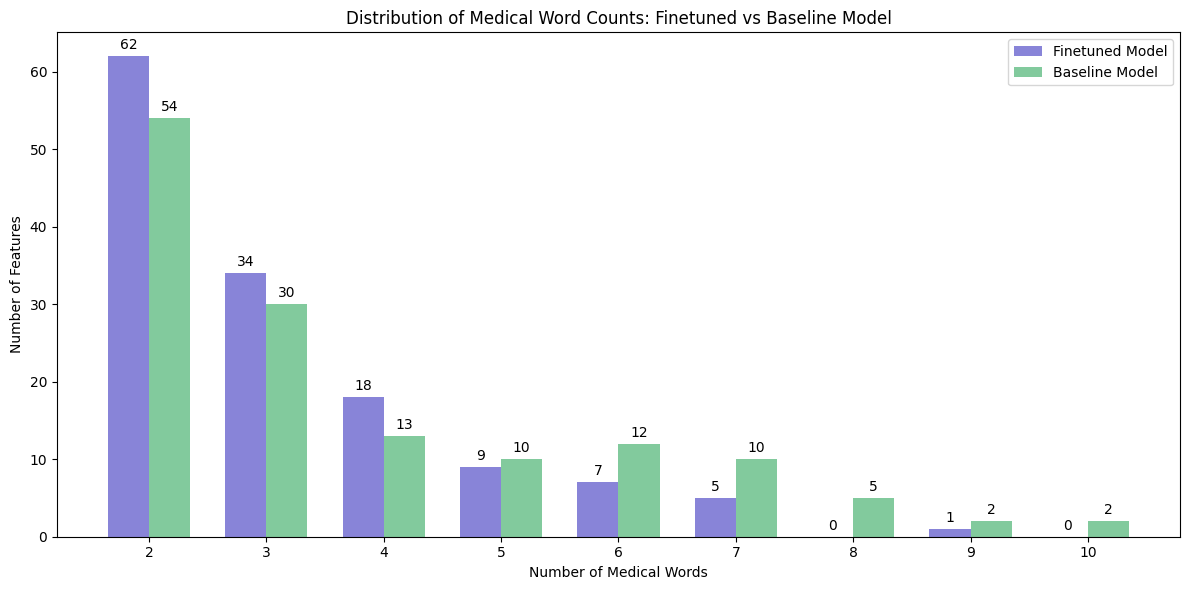

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
counts = [2, 3, 4, 5, 6, 7, 8, 9, 10]
finetuned = [62, 34, 18, 9, 7, 5, 0, 1, 0]
baseline = [54, 30, 13, 10, 12, 10, 5, 2, 2]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of each bar and positions of the bars
width = 0.35
x = np.arange(len(counts))

# Create the bars
rects1 = ax.bar(x - width/2, finetuned, width, label='Finetuned Model', color='#8884d8')
rects2 = ax.bar(x + width/2, baseline, width, label='Baseline Model', color='#82ca9d')

# Customize the plot
ax.set_xlabel('Number of Medical Words')
ax.set_ylabel('Number of Features')
ax.set_title('Distribution of Medical Word Counts: Finetuned vs Baseline Model')
ax.set_xticks(x)
ax.set_xticklabels(counts)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

# Optionally, save the figure
# plt.savefig('medical_words_comparison.png', dpi=300, bbox_inches='tight')